# WNTR Additional Examples
Here, we will have a more advanced example, using WNTR to run a stochastic simulation



## Imports
Install and import WNTR and additional Python packages that are needed for the tutorial
- Numpy is required to define comparison operators (i.e., np.greater) in queries
- Matplotlib is required to create graphics

## Note: Where you see a 💡, you need to fill in the code

In [1]:
# Install required packages if not already available
try:
    import wntr
except ImportError:
    !pip install wntr
    import wntr  # import again after installation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Units
WNTR uses **SI (International System) units (length in meters, time in seconds, mass in kilograms)**.  See https://usepa.github.io/WNTR/units.html for more details.

# Running a stochastic simulation
Often, system conditions, such as consumer demands are dynamic and uncertain, requiring us to update simulations to account for these changes.
In this example, we demonstrate how to model such uncertainty by randomly varying the demands and examining how this affects the tank water level.

Main steps:
1. Select a node of interest.
2. Introduce random uncertainty in the demand, assuming a uniform distribution between 0.5 and 1.5 of the base demand.
3. Run hydraulic simulations for both the original and modified demands.
4. Plot the node demands and pressures, the tank water level, and the pump flow for comparison between the two conditions.

## Get node, tank, pump and run basic simulation

In [4]:
# Import .inp and run simulation
inp = '💡'
wn = wntr.network.WaterNetworkModel(inp)
sim = wntr.sim.EpanetSimulator(wn)
results_base = sim.run_sim() # this is the step that actually runs the simulation

units = 15850.3 # cms to gpm

In [5]:
# get all node names
node_names = wn.junction_name_list
print(node_names)

['10', '15', '20', '35', '40', '50', '60', '601', '61', '101', '103', '105', '107', '109', '111', '113', '115', '117', '119', '120', '121', '123', '125', '127', '129', '131', '139', '141', '143', '145', '147', '149', '151', '153', '157', '159', '161', '163', '164', '166', '167', '169', '171', '173', '177', '179', '181', '183', '184', '185', '187', '189', '191', '193', '195', '197', '199', '201', '203', '204', '205', '206', '207', '208', '209', '211', '213', '215', '217', '219', '225', '229', '231', '237', '239', '241', '243', '247', '249', '251', '253', '255', '257', '259', '261', '263', '265', '267', '269', '271', '273', '275']


In [6]:
# let's use junction 109 as an example
idx = node_names.index('109') # find the index of '109'
idx

13

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# select this node
node = wn.get_node(node_names[idx])
node

<Junction '109', elevation=6.1874400000000005, demand_timeseries_list=<Demands: [<TimeSeries: base_value=0.014599071446960002, pattern_name='1', category='None'>]>>

In [9]:
node.demand_timeseries_list[0].pattern_name

'1'

In [10]:
# store node ID
selected_node = node.name
print(selected_node)

109


In [ ]:
# get tank list
print("Tank names", 💡)

# get pump list
print("Pump names", 💡)

Tank names ['1', '2', '3']
Pump names ['10', '335']


In [ ]:
# let's use tank '1' and pump '10'
tank = 💡
tank

'1'

In [12]:
pump = 💡
pump

'10'

In [ ]:
# get base results

# base results: pressure, demand, tank, pump
results_demand_base = results_base.node['demand'][selected_node]*units # why do we use "results_base" here?
results_pressure_base = results_base.node['pressure'][selected_node]
results_tank_base = results_base.node['pressure'][tank]
results_pump_base = results_base.link['flowrate'][pump]*units
time_hours = results_pressure_base.index / 3600  # Convert seconds to hours


In [ ]:
results_demand_base

,109
0,310.075562
3600,448.915375
7200,337.843506
10800,333.215546
14400,175.863754
...,...
590400,196.689713
594000,222.143692
597600,286.935577
601200,386.437469


## Update demand, run new simulation, and compare results

In [ ]:
# get base demand
base_demand = node.demand_timeseries_list[0].base_value
print(base_demand)

0.014599071446960002


In [ ]:
# generate random number between 0.5 to 1.5
multiplier = np.random.uniform(0.5, 1.5)
print(multiplier)

1.2656772088906962


In [ ]:
# update demand
node.demand_timeseries_list[0].base_value = base_demand*multiplier
print(node.demand_timeseries_list[0].base_value)

0.01847771200138419


In [ ]:
# run new simulation
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()

In [ ]:
# get new results

# new results: pressure, demand, tank, pump
results_demand_new = results.node[💡][💡]*units
results_pressure_new = results.node[💡][💡]
results_tank_new = results.node[💡][💡]
results_pump_new = results.link[💡][💡]*units


In [ ]:
results_demand_base.head()

,109
0,310.075562
3600,448.915375
7200,337.843506
10800,333.215546
14400,175.863754


In [ ]:
results_demand_new.head()

,109
0,392.455566
3600,568.181946
7200,427.600861
10800,421.743286
14400,222.586731


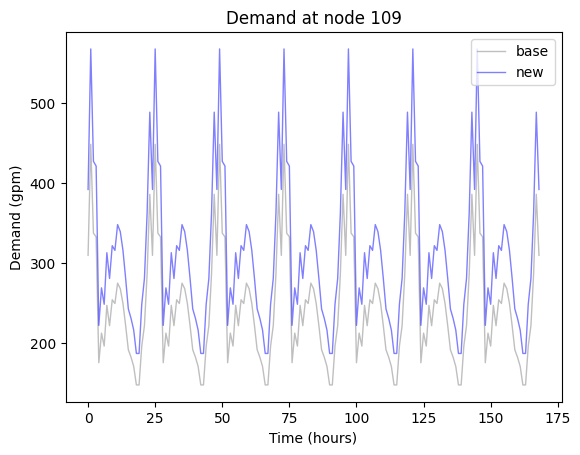

In [ ]:
# Make some plots

# plot the demand
plt.plot(💡, 💡, color='gray', linewidth = 1, alpha = 0.5)
plt.plot(💡, 💡, color='blue', linewidth = 1, alpha = 0.5)
# Formatting the plot
plt.xlabel('Time (hours)')
plt.ylabel('Demand (gpm)')
plt.title('Demand at node ' + selected_node)
plt.legend(['base','new'], loc='best') # how does it know which one is "base" and which one is "new" ?
plt.show()


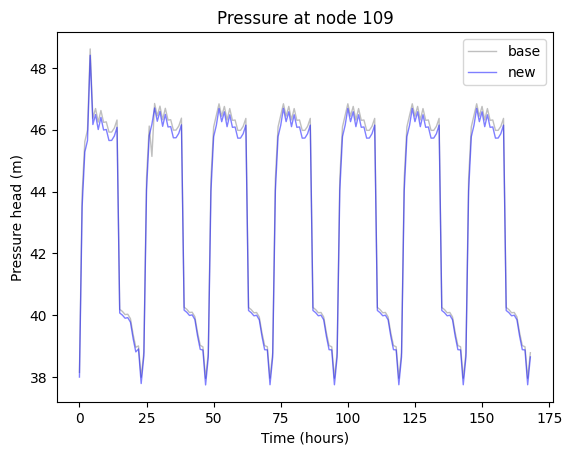

In [ ]:
# plot the pressure
💡
# Formatting the plot
💡

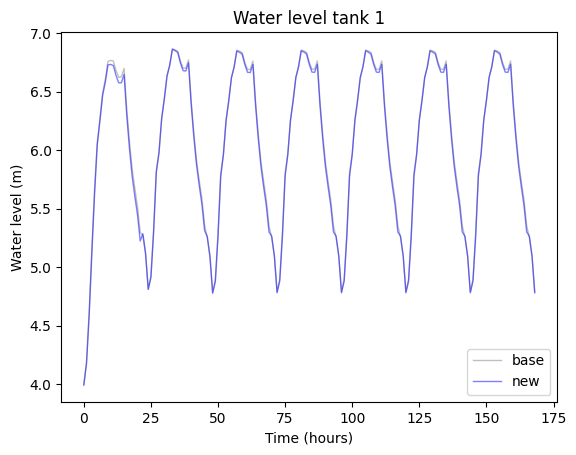

In [ ]:
# plot the tank water level
💡
# Formatting the plot
💡

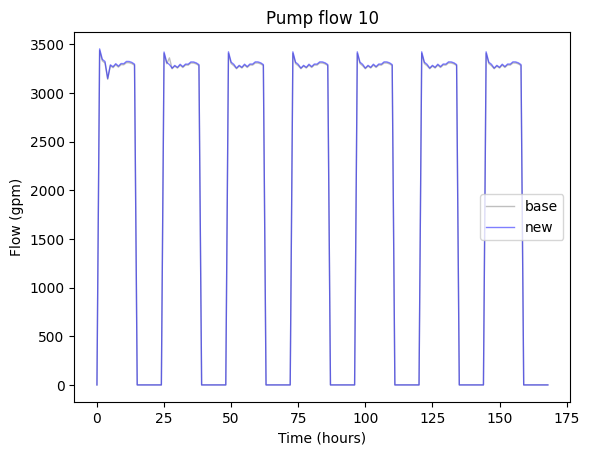

In [ ]:
# pump
plt.plot(time_hours, results_pump_base, color='gray', linewidth = 1, alpha = 0.5)
plt.plot(time_hours, results_pump_new, color='blue', linewidth = 1, alpha = 0.5)
# Formatting the plot
plt.xlabel('Time (hours)')
plt.ylabel('Flow (gpm)')
plt.title('Pump flow ' + pump)
plt.legend({'base','new'}, loc='best')
plt.show()

**Additional notes:**
Next, you can use the loops we covered last time, change demands at all nodes, and see the impact of uncertainty in demand